<h3><em>Обробка та аналіз БМД Лабораторна 6 Кононов Антон БС-82</em></h3>
<h5>Парний t-критерій Стьюдента</h5>

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
import seaborn as sns

In [3]:
col_1 = randint(0, 20, 7)
col_2 = randint(0, 20, 7)
data = pd.DataFrame({"Малий басейн": col_1, "Великий басейн": col_2,}, index = ["9:00 - 11:00", "11:00 - 13:00","13:00 - 15:00", "15:00 - 17:00", "17:00 - 19:00", "19:00 - 21:00", "21:00 - 23:00"])
data.index.name = 'Година'
data.columns.name = 'Кількість відвідувачів'
data

Кількість відвідувачів,Малий басейн,Великий басейн
Година,,
9:00 - 11:00,11,12
11:00 - 13:00,19,6
13:00 - 15:00,14,9
15:00 - 17:00,12,1
17:00 - 19:00,19,3
19:00 - 21:00,15,7
21:00 - 23:00,10,12


2.Побудувати графік, що відображає розкид даних в групах. Приклад:

[]

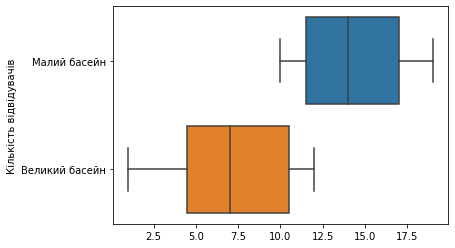

In [4]:
sns.boxplot(data = data, orient = 'h').set()

3.Написати функції:
- для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

- для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [121]:
def Pirson(x, y):
    n = len(x)
    r = ( sum(x * y) - n * (sum(x)/n) * (sum(y)/n) ) / ( n * ( ( ( sum(x**2)/n - (sum(x)/n)**2 ) * ( sum(y**2)/n - (sum(y)/n)**2) ) )**(1/2) )
    print("Значення коефіцієнту кореляції: " + str(r))
    df = n - 2
    print("Значення ступеня свободи: " + str(df))
    critical_table = pd.read_excel("critical_table.xlsx")
    a = critical_table.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту кореляції = " + str(a))
    result = ("significant") if abs(r) > a else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return r, df, result  

In [122]:
def Student(x, y):
    difference = x - y
    n = len(x)
    M = difference.mean()
    Sigma = difference.std()
    t = (M/Sigma) * (n)**(1/2)
    print("Значення t-критерію Стьюдента: t = "  + str(t))
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    critical_table = pd.read_excel("critical_table.xlsx")
    a = critical_table.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту Стьюдента = " + str(a))
    result = ("significant") if abs(t) > a else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return t, df, result


4.Перевірити розбіжність на між групами на даних з п. 1.

In [123]:
Pirson(col_1, col_2)

Значення коефіцієнту кореляції: 0.665182184105355
Значення ступеня свободи: 5
Критичне значення коефіцієнту кореляції = 2.571
Результат оцінки значимості зв'зку: not significant


(0.665182184105355, 5, 'not significant')

In [124]:
Student(col_1, col_2)

Значення t-критерію Стьюдента: t = -1.6879710397858665
Значення ступеня свободи: df = 6
Критичне значення коефіцієнту Стьюдента = 2.447
Результат оцінки значимості зв'зку: not significant


(-1.6879710397858665, 6, 'not significant')

5.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

Висновок: 

1)Під час аналізу залежності між групами за допомогою критерія Пірсона я отримав результат, який стверджує, що статистичної залежності немає.

2)Під час аналізу відмінності між групами за допомогою критерія t-Стьюдента, було прийнято нульову гіпотезу про рівність середніх.